Equations de départ

$$\frac{\delta u}{\delta t}=D_u\nabla^2u-uv^2+F(1-u)$$
$$\frac{\delta v}{\delta t}=D_v\nabla^2v+uv^2-(F+k)v$$

Equation discrétisée

$\frac{u^{n+1}_{i,j}-u^{n}_{i,j}}{\Delta t}=D_u(\frac{u^{n}_{i+1,j}-2u^{n}_{i,j}+u^{n}_{i-1,j}}{\Delta x^2}+\frac{u^{n}_{i,j+1}-2u^{n}_{i,j}+u^{n}_{i,j-1}}{\Delta y^2})-u^{n}_{i,j}(v^{n}_{i,j})^2+F(1-u^{n}_{i,j})
\\
\frac{v^{n+1}_{i,j}-v^{n}_{i,j}}{\Delta t}=D_v(\frac{v^{n}_{i+1,j}-2v^{n+1}_{i,j}+v^{n}_{i-1,j}}{\Delta x^2}+\frac{v^{n}_{i,j+1}-2v^{n}_{i,j}+v^{n}_{i,j-1}}{\Delta y^2})+u^{n}_{i,j}(v^{n}_{i,j})^2-(F+k)v^{n}_{i,j}$

$u^{n+1}_{i,j}=u^{n}_{i,j}+D_u\left(\frac{\Delta t}{\Delta x^2}(u^{n}_{i+1,j}-2u^{n}_{i,j}+u^{n}_{i-1,j})+\frac{\Delta t}{\Delta y^2}(u^{n}_{i,j+1}-2u^{n}_{i,j}+u^{n}_{i,j-1})\right)-\Delta t\left(u^{n}_{i,j}(v^{n}_{i,j})^2+F(1-u^{n}_{i,j})\right)
\\
v^{n+1}_{i,j}=v^{n}_{i,j}+D_v\left(\frac{\Delta t}{\Delta x^2}(v^{n}_{i+1,j}-2v^{n+1}_{i,j}+v^{n}_{i-1,j})+\frac{\Delta t}{\Delta y^2}(v^{n}_{i,j+1}-2v^{n}_{i,j}+v^{n}_{i,j-1})\right)+\Delta t\left(u^{n}_{i,j}(v^{n}_{i,j})^2-(F+k)v^{n}_{i,j}\right)$

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
n = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
dh = 5./(n-1) #=dx=dy
T = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)

In [3]:
uvinitial = numpy.load('uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

[[ 1.03341932  1.00909902  1.03523907 ...,  1.01236     1.02769296
   1.01185515]
 [ 1.02049366  1.03874603  1.03186003 ...,  1.00917594  1.00648275
   1.01929723]
 [ 1.0297385   1.02874589  1.02488765 ...,  1.0345737   1.00195443
   1.03189674]
 ..., 
 [ 1.03851006  1.01833226  1.00260628 ...,  1.00514165  1.04292736
   1.0090857 ]
 [ 1.03951143  1.0425582   1.03609776 ...,  1.00643229  1.04094253
   1.03869138]
 [ 1.01132752  1.00554757  1.00241105 ...,  1.04435044  1.02683595
   1.01239924]]
[[ 0.04286057  0.01747253  0.03235064 ...,  0.0283667   0.03892816
   0.0255146 ]
 [ 0.03567483  0.04898278  0.03607639 ...,  0.02100673  0.0305137
   0.00374435]
 [ 0.04936444  0.0423903   0.00414055 ...,  0.02084643  0.03015715
   0.03085144]
 ..., 
 [ 0.03707045  0.03856759  0.01737007 ...,  0.00421018  0.03256909
   0.00247397]
 [ 0.04781775  0.00190273  0.02729943 ...,  0.02507722  0.0468819
   0.00760259]
 [ 0.01798466  0.02495585  0.04354743 ...,  0.00184759  0.01039884
   0.01832535]]


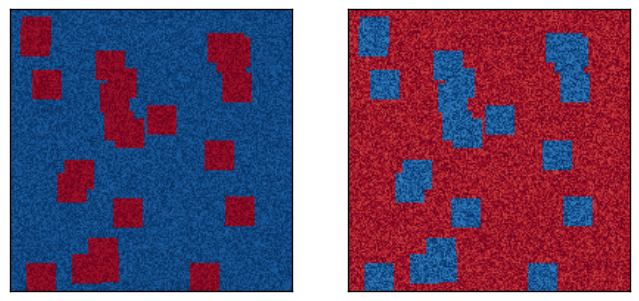

In [4]:
print(U)
print(V)

fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [5]:
def ftcs(U, V, nt, Du, Dv, dt, dh, F, k):
   
    for n in range(nt):
        Un = U.copy()
        Vn = V.copy()
        U[1:-1,1:-1] = Un[1:-1,1:-1] + Du *\
            (dt/dh**2 * (Un[2:,1:-1] - 2*Un[1:-1,1:-1] + Un[:-2,1:-1]) +\
             dt/dh**2 * (Un[1:-1,2:] - 2*Un[1:-1,1:-1] + Un[1:-1,:-2]))-\
             dt*(Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2+F*(1-Un[1:-1,1:-1]))
        V[1:-1,1:-1] = Vn[1:-1,1:-1] + Du *\
            (dt/dh**2 * (Vn[2:,1:-1] - 2*Vn[1:-1,1:-1] + Vn[:-2,1:-1]) +\
             dt/dh**2 * (Vn[1:-1,2:] - 2*Vn[1:-1,1:-1] + Vn[1:-1,:-2]))+\
            dt*(Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2-(F+k)*Vn[1:-1,1:-1])
        # Enforce Neumann BCs
        U[-1,:] = U[-2,:]
        U[:,-1] = U[:,-2]
        U[0,:] = U[1,:]
        U[:,0] = U[:,1]
        V[-1,:] = V[-2,:]
        V[:,-1] = V[:,-2]
        V[0,:] = V[1,:]
        V[:,0] = V[:,1]
    return U

In [6]:
A = ftcs(U, V, nt, Du, Dv, dt, dh, F, k)

In [7]:
print(A)

[[ -6.30647820e+118  -6.30647820e+118  -6.30621155e+118 ...,
   -4.44491503e+118  -4.44465278e+118  -4.44465278e+118]
 [ -6.30647820e+118  -6.30647820e+118  -6.30621155e+118 ...,
   -4.44491503e+118  -4.44465278e+118  -4.44465278e+118]
 [ -6.30624853e+118  -6.30624853e+118  -6.30598203e+118 ...,
   -4.44480137e+118  -4.44453903e+118  -4.44453903e+118]
 ..., 
 [ -6.13342644e+118  -6.13342644e+118  -6.13329860e+118 ...,
   -3.15090464e+118  -3.15031466e+118  -3.15031466e+118]
 [ -6.13373312e+118  -6.13373312e+118  -6.13360519e+118 ...,
   -3.15072196e+118  -3.15013194e+118  -3.15013194e+118]
 [ -6.13373312e+118  -6.13373312e+118  -6.13360519e+118 ...,
   -3.15072196e+118  -3.15013194e+118  -3.15013194e+118]]


In [8]:
A[100,::40]

array([ -5.71751466e+118,  -5.71364180e+118,  -5.45449694e+118,
        -4.75536801e+118,  -4.01962378e+118])